# Random Forest

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
import numpy as np
from collections import Counter
from feature_selection import rf_select


pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

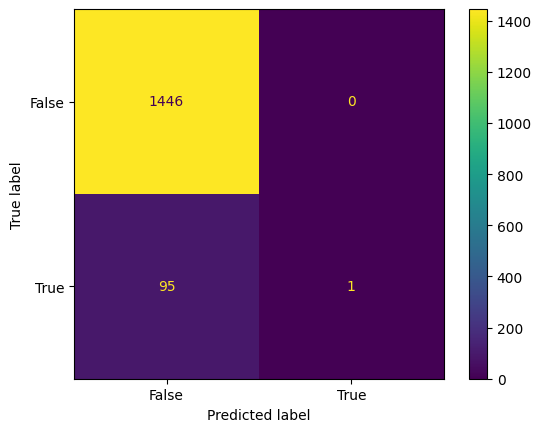

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


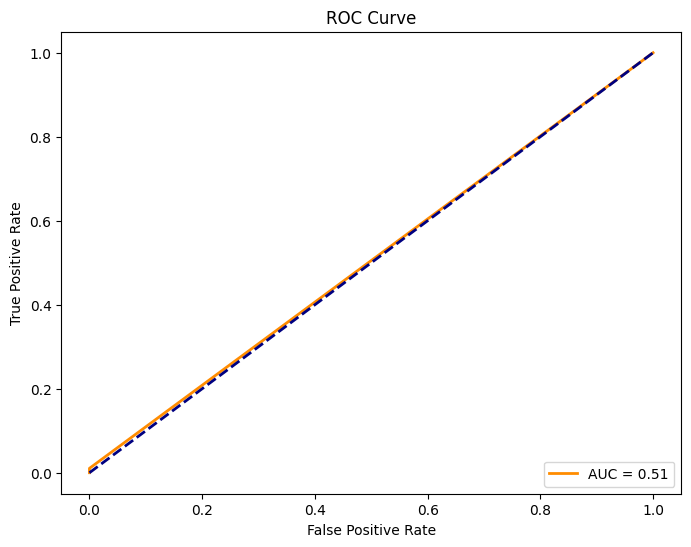

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Undersample

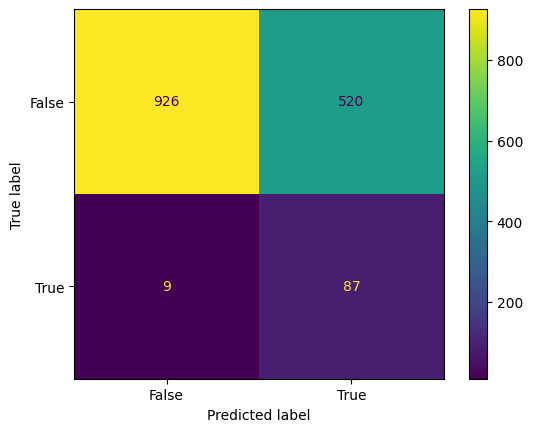

Accuracy: 0.6569390402075227
Precision: 0.14332784184514002
Recall: 0.90625
Specificity: 0.640387275242047
F1_score: 0.24751066856330015


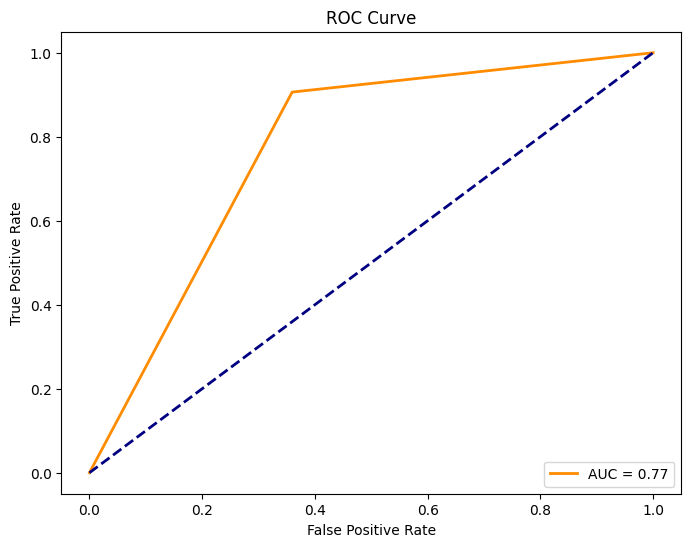

In [24]:
X_under, y_under = undersample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Oversample

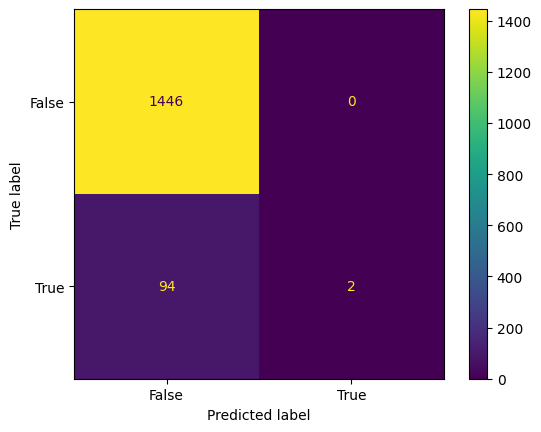

Accuracy: 0.9390402075226978
Precision: 1.0
Recall: 0.020833333333333332
Specificity: 1.0
F1_score: 0.04081632653061225


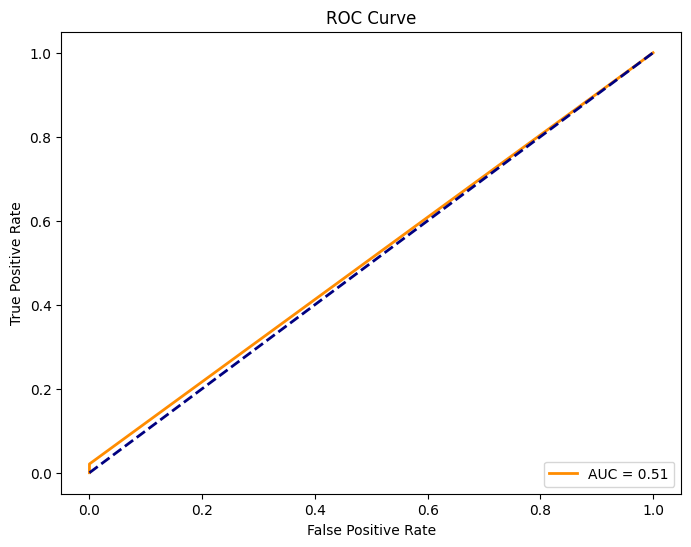

In [25]:
X_over, y_over = oversample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_over, y_over)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE

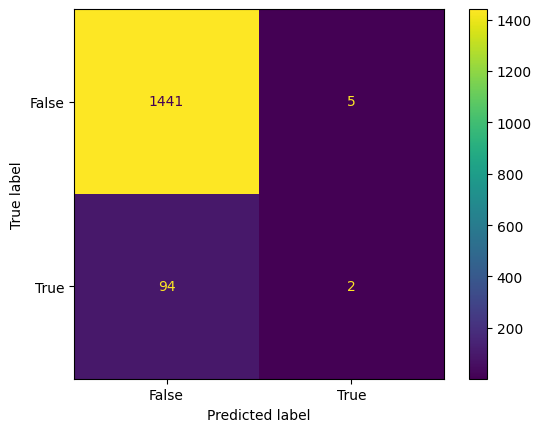

Accuracy: 0.9357976653696498
Precision: 0.2857142857142857
Recall: 0.020833333333333332
Specificity: 0.9965421853388658
F1_score: 0.03883495145631068


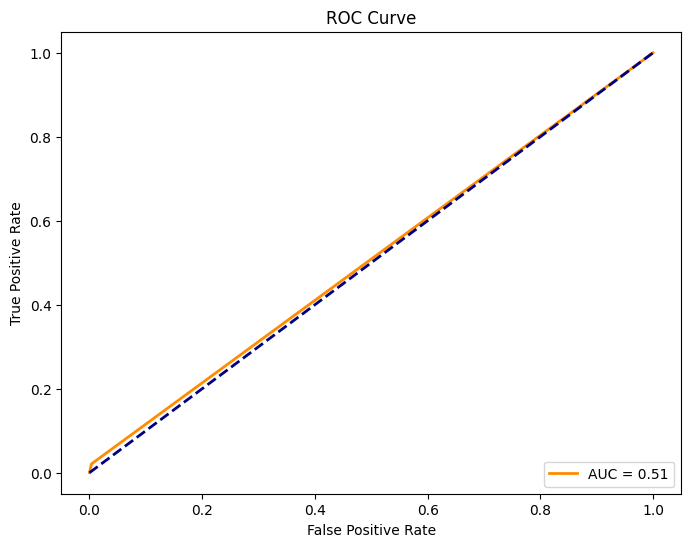

In [26]:
X_smote, y_smote = smote(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Neighbourhood Cleaning Rule

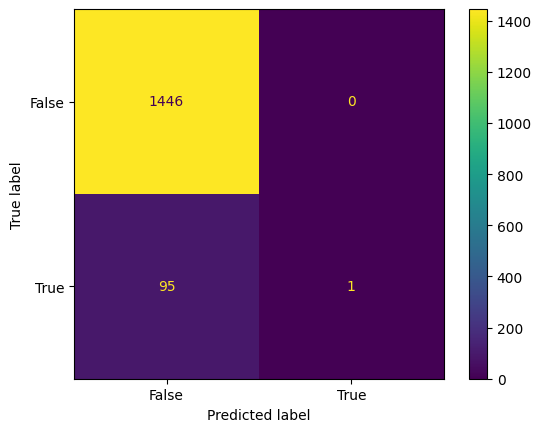

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


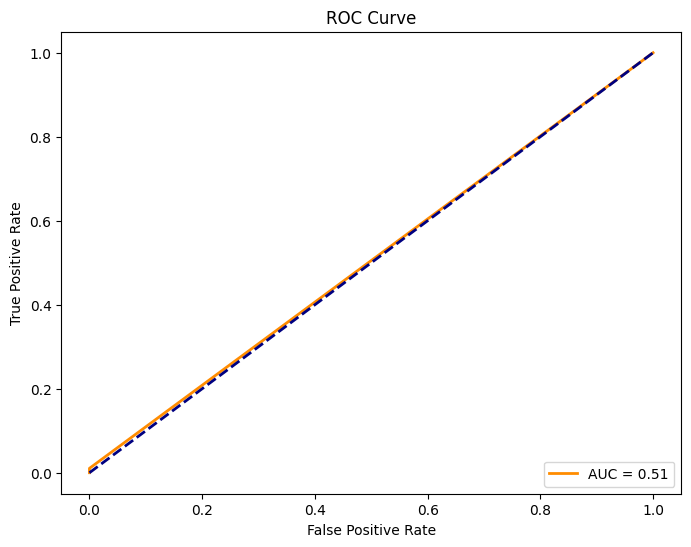

In [27]:
X_ncr, y_ncr = ncr(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_ncr, y_ncr)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Feature Selection

In [28]:
features = rf_select(X_train, y_train)

## Undersampling with feature selection

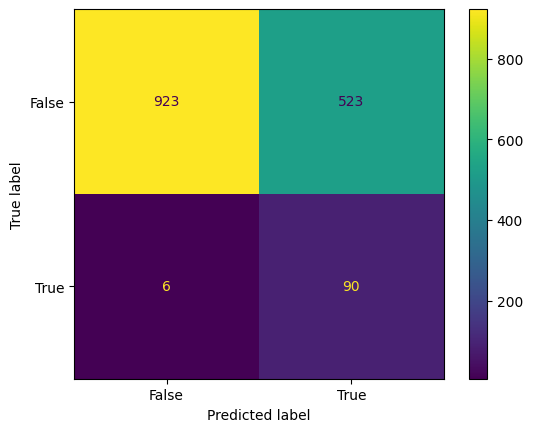

Accuracy: 0.6569390402075227
Precision: 0.1468189233278956
Recall: 0.9375
Specificity: 0.6383125864453665
F1_score: 0.2538787023977433


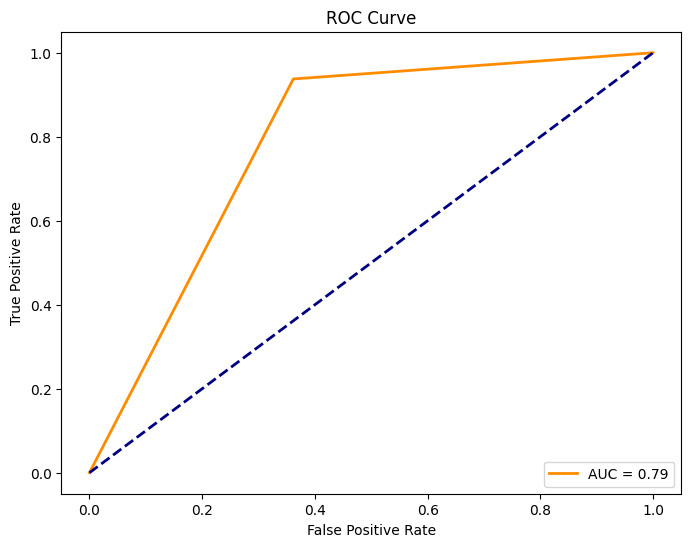

In [29]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val_under)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE with feature selection

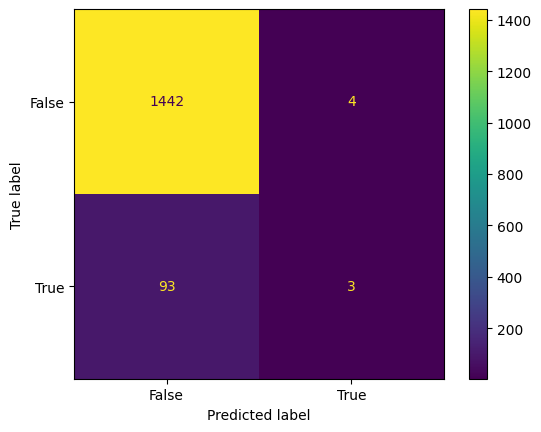

Accuracy: 0.937094682230869
Precision: 0.42857142857142855
Recall: 0.03125
Specificity: 0.9972337482710927
F1_score: 0.05825242718446602


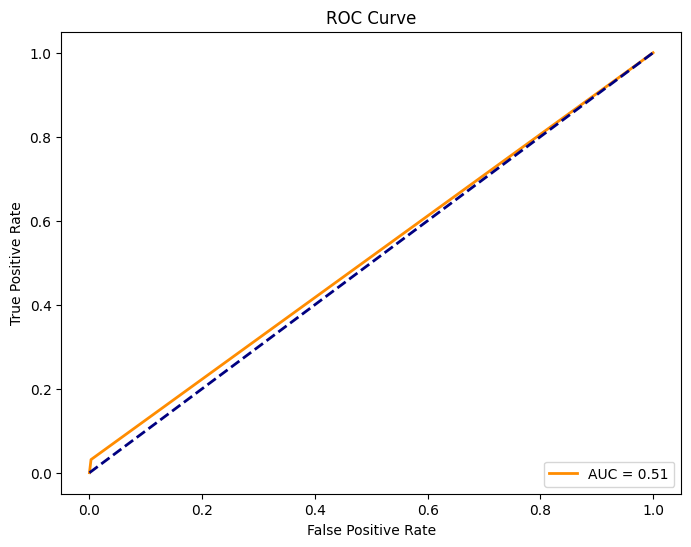

In [30]:
X_smote, y_smote = smote(X_train, y_train)
X_smote = X_smote[features]
X_val_smote = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val_smote)
show_metrics(y_val, y_pred, 1, 0)

## Undersampling with feature selection and hyperparameter tuning

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


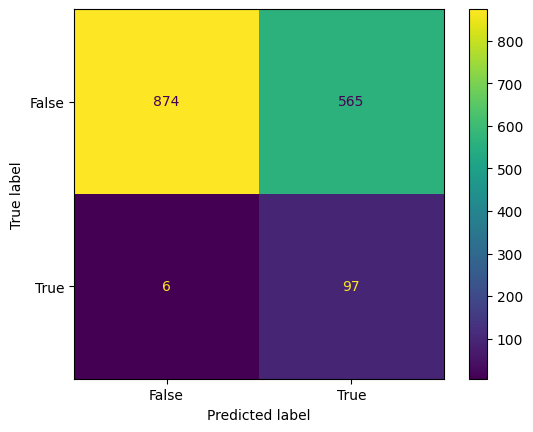

Accuracy: 0.6297016861219196
Precision: 0.14652567975830816
Recall: 0.941747572815534
Specificity: 0.6073662265462126
F1_score: 0.25359477124183005


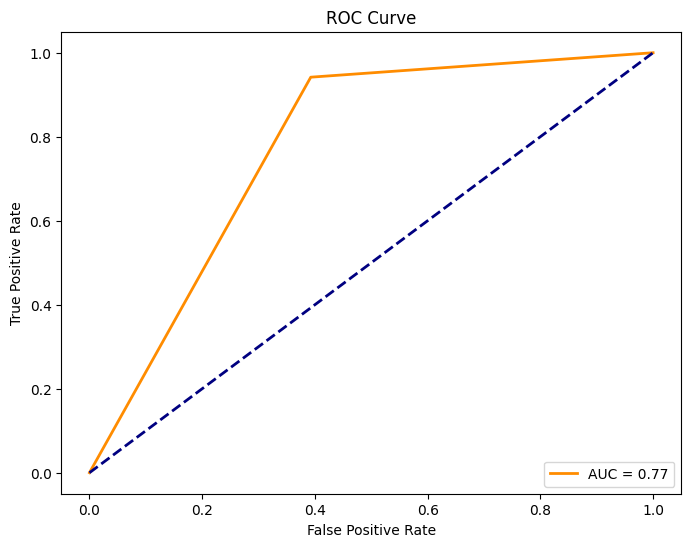

In [32]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
X_test_under = X_test[features]

grid = {'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 300, 1000]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = grid, cv=5, scoring='recall')

grid_search.fit(X_under, y_under)
best_rf = grid_search.best_estimator_
print('Best hyperparameters:',  grid_search.best_params_)

y_pred = best_rf.predict(X_test_under)
show_metrics(y_test, y_pred, 1, 0)